In [580]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import git, os, requests, json, pickle, time
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
import cufflinks

In [3]:
years = [2017, 2018, 2019, 2020]

# Data loading and concatenating

In [15]:
analyzed_data = {}
offer_data = {}
postdoc_status = {}
for year in years:
    analyzed_data[year] = pd.read_pickle('data/analyzed_data_'+str(year))
    postdoc_status[year] = pd.read_pickle('data/postdoc_status_'+str(year))
    offer_data[year] = pd.read_pickle('data/offer_data_'+str(year))

In [30]:
X = pd.concat(postdoc_status).join(pd.concat(analyzed_data).drop(['affiliations','offers'],axis=1))

In [31]:
print(X.columns)

Index(['postdoc', 'affiliations_total', 'collaboration', 'papers_total',
       'papers_last_year', 'papers_three_years', 'citations_total',
       'citations_median', 'citations_max', 'citations_per_paper',
       'time_since_paper2', 'time_since_paper1'],
      dtype='object')


In [32]:
print('Fraction of applicants who are postdocs:', round(X['postdoc'].mean(),3))
print('Fraction of applicants in a collaboration:', round(X['collaboration'].mean(),3))

Fraction of applicants who are postdocs: 0.574
Fraction of applicants in a collaboration: 0.209


# Career-long properties

Postdocs: [5.2,7.7] (median: 6.3)
PhD Students: [1.8,3.4] (median: 2.6)


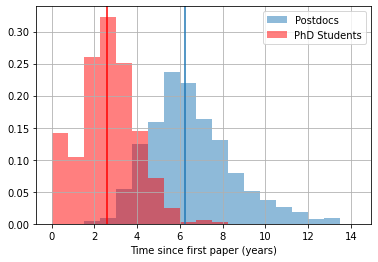

In [291]:
feature = 'time_since_paper1'
X[X['postdoc']==1][feature].hist(density=True, bins=30*np.arange(20)/40,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=30*np.arange(20)/40,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Time since first paper (years)')
plt.legend()
print(f"Postdocs: [{round(X[X['postdoc']==1][feature].quantile(0.25),1)},{round(X[X['postdoc']==1][feature].quantile(0.75),1)}] (median: {round(X[X['postdoc']==1][feature].quantile(0.5),1)})")
print(f"PhD Students: [{round(X[X['postdoc']==0][feature].quantile(0.25),1)},{round(X[X['postdoc']==0][feature].quantile(0.75),1)}] (median: {round(X[X['postdoc']==0][feature].quantile(0.5),1)})")

Postdocs: [10.0,21.0] (median: 15.0)
PhD Students: [4.0,8.0] (median: 5.0)


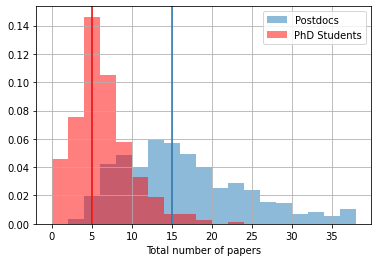

In [282]:
feature = 'papers_total'
X[X['postdoc']==1][feature].hist(density=True, bins=40*np.arange(20)/20,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=40*np.arange(20)/20,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Total number of papers')
plt.legend()

print(f"Postdocs: [{X[X['postdoc']==1][feature].quantile(0.25)},{X[X['postdoc']==1][feature].quantile(0.75)}] (median: {X[X['postdoc']==1][feature].quantile(0.5)})")
print(f"PhD Students: [{X[X['postdoc']==0][feature].quantile(0.25)},{X[X['postdoc']==0][feature].quantile(0.75)}] (median: {X[X['postdoc']==0][feature].quantile(0.5)})")

Postdocs: [140.0,534.0] (median: 297.0)
PhD Students: [21.0,107.0] (median: 52.0)


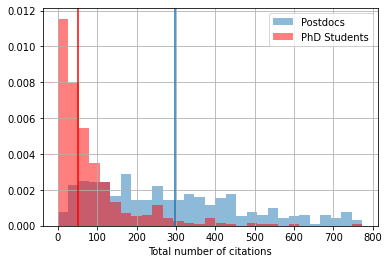

In [281]:
feature = 'citations_total'
X[X['postdoc']==1][feature].hist(density=True, bins=800*np.arange(30)/30,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=800*np.arange(30)/30,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Total number of citations')
plt.legend()
print(f"Postdocs: [{X[X['postdoc']==1][feature].quantile(0.25)},{X[X['postdoc']==1][feature].quantile(0.75)}] (median: {X[X['postdoc']==1][feature].quantile(0.5)})")
print(f"PhD Students: [{X[X['postdoc']==0][feature].quantile(0.25)},{X[X['postdoc']==0][feature].quantile(0.75)}] (median: {X[X['postdoc']==0][feature].quantile(0.5)})")

# Intensive properties

Postdocs: [7.5,17.0] (median: 11.5)
PhD Students: [3.5,11.0] (median: 7.0)


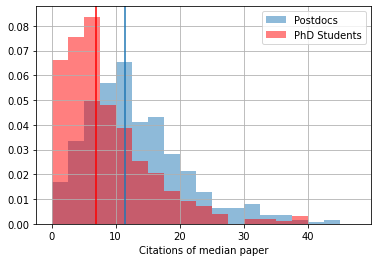

In [292]:
feature = 'citations_median'
X[X['postdoc']==1][feature].hist(density=True, bins=50*np.arange(20)/20,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=50*np.arange(20)/20,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Citations of median paper')
plt.legend()
print(f"Postdocs: [{X[X['postdoc']==1][feature].quantile(0.25)},{X[X['postdoc']==1][feature].quantile(0.75)}] (median: {X[X['postdoc']==1][feature].quantile(0.5)})")
print(f"PhD Students: [{X[X['postdoc']==0][feature].quantile(0.25)},{X[X['postdoc']==0][feature].quantile(0.75)}] (median: {X[X['postdoc']==0][feature].quantile(0.5)})")

Postdocs: [11.9,28.1] (median: 18.7)
PhD Students: [5.7,17.0] (median: 9.9)


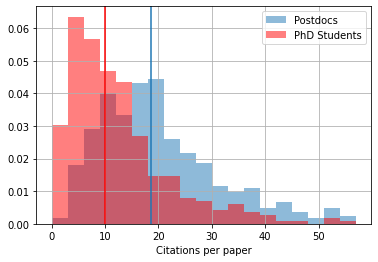

In [296]:
feature = 'citations_per_paper'
X[X['postdoc']==1][feature].hist(density=True, bins=60*np.arange(20)/20,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=60*np.arange(20)/20,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Citations per paper')
plt.legend()
print(f"Postdocs: [{round(X[X['postdoc']==1][feature].quantile(0.25),1)},{round(X[X['postdoc']==1][feature].quantile(0.75),1)}] (median: {round(X[X['postdoc']==1][feature].quantile(0.5),1)})")
print(f"PhD Students: [{round(X[X['postdoc']==0][feature].quantile(0.25),1)},{round(X[X['postdoc']==0][feature].quantile(0.75),1)}] (median: {round(X[X['postdoc']==0][feature].quantile(0.5),1)})")

Postdocs: [5.0,11.0] (median: 8.0)
PhD Students: [3.0,7.0] (median: 5.0)


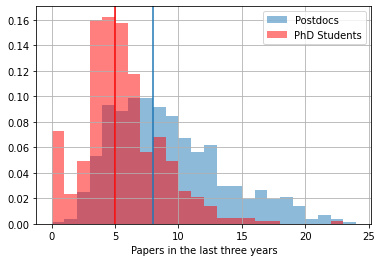

In [297]:
feature = 'papers_three_years'
X[X['postdoc']==1][feature].hist(density=True, bins=25*np.arange(25)/25,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=25*np.arange(25)/25,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Papers in the last three years')
plt.legend()
print(f"Postdocs: [{round(X[X['postdoc']==1][feature].quantile(0.25),1)},{round(X[X['postdoc']==1][feature].quantile(0.75),1)}] (median: {round(X[X['postdoc']==1][feature].quantile(0.5),1)})")
print(f"PhD Students: [{round(X[X['postdoc']==0][feature].quantile(0.25),1)},{round(X[X['postdoc']==0][feature].quantile(0.75),1)}] (median: {round(X[X['postdoc']==0][feature].quantile(0.5),1)})")

Postdocs: [2.0,5.0] (median: 3.0)
PhD Students: [1.0,3.0] (median: 2.0)


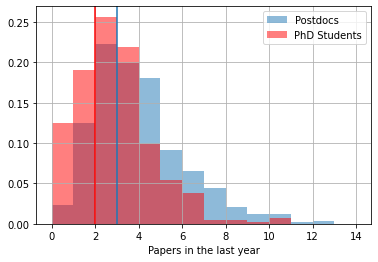

In [298]:
feature = 'papers_last_year'
X[X['postdoc']==1][feature].hist(density=True, bins=15*np.arange(15)/15,alpha=0.5, label='Postdocs')
plt.axvline(X[X['postdoc']==1][feature].median())
X[X['postdoc']==0][feature].hist(density=True, bins=15*np.arange(15)/15,alpha=0.5, label='PhD Students', color='r')
plt.axvline(X[X['postdoc']==0][feature].median(),color='r')
plt.xlabel('Papers in the last year')
plt.legend()
print(f"Postdocs: [{round(X[X['postdoc']==1][feature].quantile(0.25),1)},{round(X[X['postdoc']==1][feature].quantile(0.75),1)}] (median: {round(X[X['postdoc']==1][feature].quantile(0.5),1)})")
print(f"PhD Students: [{round(X[X['postdoc']==0][feature].quantile(0.25),1)},{round(X[X['postdoc']==0][feature].quantile(0.75),1)}] (median: {round(X[X['postdoc']==0][feature].quantile(0.5),1)})")

# Application Results

In [110]:
Y = pd.concat(offer_data)

In [124]:
Y.columns

Index(['number_of_offers', 'first_post_time', 'round1'], dtype='object')

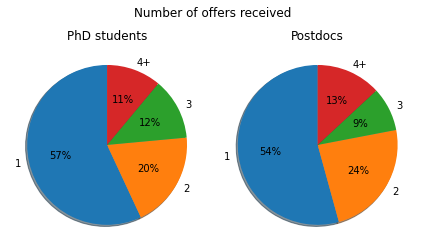

In [228]:
plt.suptitle('Number of offers received')
plt.subplot(1, 2, 2)
Y[X['postdoc']==1]['number_of_offers'].value_counts(bins=[0,1,2,3,10],sort=False).plot.pie(labels=['1','2','3','4+'], autopct='%1.f%%', shadow=True, startangle=90)
plt.title('Postdocs')
plt.ylabel('')
plt.subplot(1,2,1)
Y[X['postdoc']==0]['number_of_offers'].value_counts(bins=[0,1,2,3,10],sort=False).plot.pie(labels=['1','2','3','4+'], autopct='%1.f%%', shadow=True, startangle=90)
plt.title('PhD students')
plt.ylabel('')
plt.tight_layout()

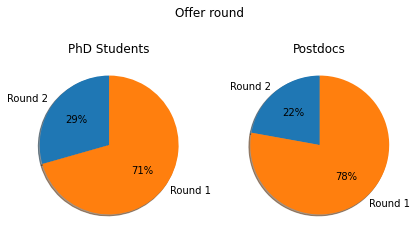

In [230]:
plt.suptitle('Offer round')
plt.subplot(1, 2, 1)
Y[X['postdoc']==0]['round1'].value_counts(sort=False).plot.pie(labels=['Round 2','Round 1'], autopct='%1.f%%', shadow=True, startangle=90)
plt.title('PhD Students')
plt.ylabel('')
plt.subplot(1,2,2)
Y[X['postdoc']==1]['round1'].value_counts(sort=False).plot.pie(labels=['Round 2','Round 1'], autopct='%1.f%%', shadow=True, startangle=90)
plt.title('Postdocs')
plt.ylabel('')
plt.tight_layout()

Text(0.5, 1.0, 'Occupation of first round hires')

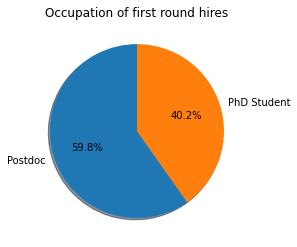

In [315]:
X[Y['round1']==1]['postdoc'].value_counts().plot.pie(labels=['Postdoc','PhD Student'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.ylabel('')
plt.title('Occupation of first round hires')

Text(0.5, 1.0, 'Occupation of all hires')

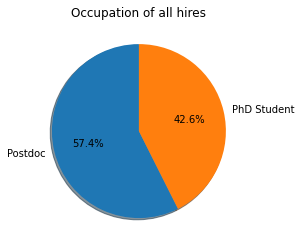

In [317]:
X['postdoc'].value_counts().plot.pie(labels=['Postdoc','PhD Student'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.ylabel('')
plt.title('Occupation of all hires')

# Interactive

In [349]:
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
pd.options.plotting.backend = "plotly"

In [578]:
h1_pd = go.Histogram(
    x= X[X['postdoc']==1]['citations_per_paper'],
    visible=True,
    name='Postdocs', 
    histnorm='', 
    opacity=1, 
    bingroup='1', 
    legendgroup='pd')

h1_phd = go.Histogram(
    x= X[X['postdoc']==0]['citations_per_paper'],
    visible=True,
    name='PhD Students', 
    histnorm='', 
    opacity=1, 
    bingroup='1', 
    legendgroup='phd')

In [624]:
layout = go.Layout(
    title = {'text':'Postdoc application statistics (2017-2020)', 'x':0., 'y':0.975, 'yanchor':'top', 'xanchor':'left'}, 
    barmode='stack', 
    margin={'t':150, 'b':150},
    updatemenus = [
        dict(
        x = 0., xanchor='left',
        y = 1.05, yanchor = 'bottom',
        buttons = list([
            dict(
                args=['x',[X[X['postdoc']==1]['citations_per_paper'],X[X['postdoc']==0]['citations_per_paper']]],
                label = 'Mean citations per paper',
                method = 'restyle'
            ),
             dict(
                args=['x',[X[X['postdoc']==1]['citations_median'],X[X['postdoc']==0]['citations_median']]],
                label = 'Median citations per paper',
                method = 'restyle'
            ),
            dict(
                args=['x',[X[X['postdoc']==1]['citations_total'],X[X['postdoc']==0]['citations_total']]],
                label = 'Total citations',
                method = 'restyle'
            ),
            dict(
                args=['x',[X[X['postdoc']==1]['papers_total'],X[X['postdoc']==0]['papers_total']]],
                label = 'Total number of papers',
                method = 'restyle'
            ),
            dict(
                args=['x',[X[X['postdoc']==1]['papers_last_year'],X[X['postdoc']==0]['papers_last_year']]],
                label = 'Papers in the last year',
                method = 'restyle'
            ),
            dict(
                args=['x',[X[X['postdoc']==1]['papers_three_years'],X[X['postdoc']==0]['papers_three_years']]],
                label = 'Papers in the last three years',
                method = 'restyle'
            ),
        ]),
        ),
        dict(
        x = -0.05, xanchor = 'right',
        y = 0.5,
        yanchor = 'auto',
        buttons = list([
            dict(
                args=[{'histnorm' :2*[''],
                       'opacity' : 2*[1]},
                       {'barmode' : 'stack'}
                      ],
                label = 'Absolute',
                method = 'update',
            ),
             dict(
                args=[{'histnorm': 2*['probability'],
                       'opacity' : 2*[0.75]},
                       {'barmode': 'overlay'}
                      ],
                label = 'Relative',
                method = 'update',
            ),
        ]),
        ),
        dict(
        x = 0.9, xanchor = 'center',
        y = -0.05, yanchor = 'top',
        buttons = list([
            dict(
                args=['cumulative', {'enabled':False}],
                label = 'Interval',
                method = 'restyle'
            ),
             dict(
                args=['cumulative', {'enabled':True}],
                label = 'Cumulative',
                method = 'restyle'
            ),
        ]),
        )
    ]
)
fig = go.Figure(data=[h1_pd, h1_phd], layout=layout) 
iplot(fig)

In [625]:
pio.write_html(fig, 'fig.html')